## Title :
Exercise: Variation of Coefficients for Lasso and Ridge Regression

## Description :

The goal of this exercise is to understand the variation of the coefficients of predictors with varying values of regularization parameter in Lasso and Ridge regularization.

Below is a sample plot for Ridge ($L_2$ regularization)

![fig3](fig/fig3.png)

## Data Description:

## Instructions:

- Read the dataset `bateria_train.csv` and assign the predictor and response variables.
- The predictor is the 'Spreading factor' and the response variable is the 'Perc_population'
- Use a maximum degree of 7 to make polynomial features and make a new predictor x_poly
- Make a list of alpha values.
- For each value of `$\alpha$`:
    - Fit a multi-linear regression using $L_2$ regularization
    - Compute the coefficient of the predictors and store to the plot later
- Make a plot of the coefficients along with the alpha values
- Make a new alpha list as per the code in the exercise
- Implement Lasso regularization by repeating the above steps for each value of alpha
- Make another plot of the coefficients along with the new alpha values

## Hints: 

<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html" target="_blank">np.linspace()</a>
Return evenly spaced numbers over a specified interval.

<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.transpose.html" target="_blank">np.transpose()</a>
Reverse or permute the axes of an array; returns the modified array.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.PolynomialFeatures()</a>
Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank">sklearn.fit_transform()</a>
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a>
LinearRegression fits a linear model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear modReturns the coefficient of the predictors in the model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">mean_squared_error()</a>
Mean squared error regression loss.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.coef_</a>
Returns the coefficients of the predictors.

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html" target="_blank">sklearn.Lasso()</a>
Linear Model trained with L1 prior as a regularizer.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html" target="_blank">sklearn.Ridge()</a>
Linear least squares with L2 regularization.

**Note:** This exercise is auto-graded and you can try multiple attempts. 

In [1]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


In [4]:
# Helper code to alter plot properties
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(params)
%matplotlib inline


In [7]:
# Read the file "bacteria_train.csv" as a dataframe
df = pd.read_csv("data/bacteria_train.csv")


In [8]:
# Take a quick look of your dataset
df.head()


,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


In [9]:
# Set the values of 'Spreading_factor' as the predictor 
x = df[["Spreading_factor"]]

# Set the values of 'Perc_population' as the response 
y = df[["Perc_population"]]


In [27]:
# Select the degree of the polynomial
maxdeg = 7

# Compute the polynomial features on the data
x_poly = PolynomialFeatures(maxdeg).fit_transform(x)


In [28]:
# Get a list of 1000 alpha values ranging from 10 to 120 
# np.linspace is inclusive by default unlike arange
alpha_list = np.linspace(10,120,1000)


In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### edTest(test_ridge_fit) ###
# Make an empty list called coeff_list to store the coefficients of each model
coeff_list = []

# Loop over all alpha values
for i in alpha_list:

    # Initialize a Ridge regression object with the current alpha value
    # and set normalize as True
    # ridge_reg = Ridge(alpha=i, normlaize=True)
    ridge_reg = make_pipeline(StandardScaler(), Ridge(alpha=i))

    # Fit on the transformed data
    ridge_reg.fit(x_poly, y)
    
    # Append the coeff_list with the coefficients of the trained model
    coeff_list.append(ridge_reg.named_steps['ridge'].coef_)


In [34]:
# Take the transpose of the list to get the variation in the 
# coefficient values per degree
trend = np.array(coeff_list).T


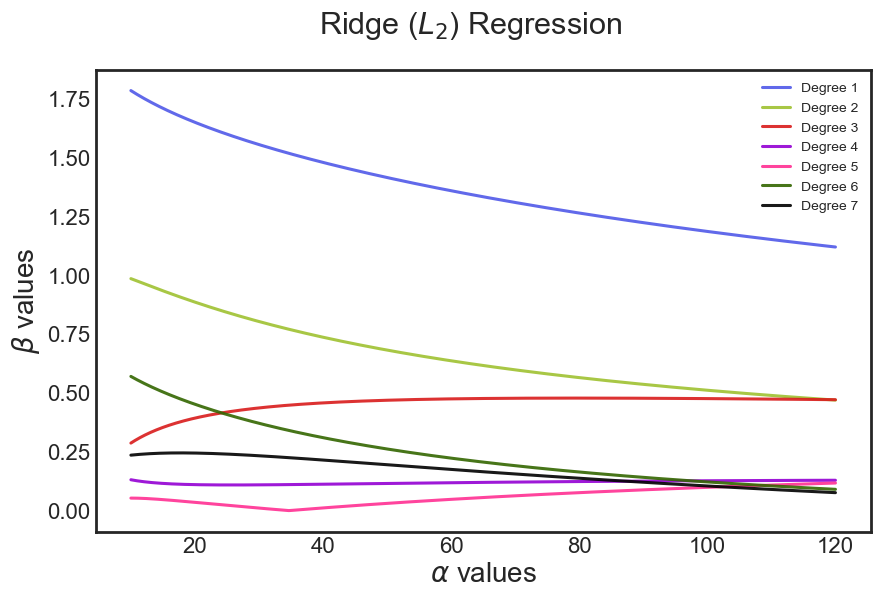

In [35]:
# Helper code to plot the variation of the coefficients as per the alpha value

# Just adding some nice colors. make sure to comment this cell out if you plan to use degree more than 7
colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list,np.abs(trend[i+1][0]),color=colors[i],alpha = 0.9,label = f'Degree {i+1}',lw=2.2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)
fig.suptitle(r'Ridge ($L_2$) Regression')
plt.show();


### Compare the results of Ridge regression with the Lasso variant

In [41]:
# Select a list of 1000 alpha values ranging from 1e-4 to 1e-1 
alpha_list = np.linspace(1e-4,1e-1,1000)


In [42]:
### edTest(test_lasso_fit) ###

# Initialize a list called to store the alpha value of each model
coeff_list = []

# Loop over all the alpha values
for i in alpha_list:

    # Create a pipeline with scaling and Lasso regression
    lasso_reg = make_pipeline(StandardScaler(), Lasso(alpha=i, max_iter=250000))

    # Fit the model
    lasso_reg.fit(x_poly, y)

    # Append the coefficients from the Lasso step
    coeff_list.append(lasso_reg.named_steps['lasso'].coef_)

In [43]:
# Get the transpose of the list to get the variation in the 
# coefficient values per degree
trend = np.array(coeff_list).T


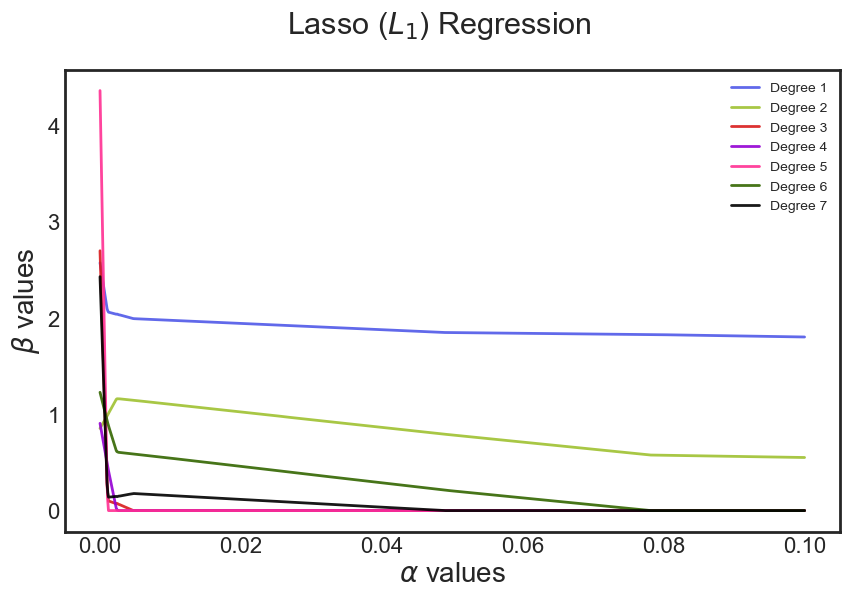

In [44]:
# Helper code below to plot the variation of the coefficients as per the alpha value
colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list,np.abs(trend[i+1]),color=colors[i],alpha = 0.9,label = f'Degree {i+1}',lw=2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Lasso ($L_1$) Regression')
plt.show();
